**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [179]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups # can't import fetch_mldata

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

from scipy.spatial import distance

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [197]:
class MyKNeighborsClassifier:
    def __init__(self, n_neighbors, algorithm, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
        self.X = []
        self.y = []
        
    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        
    def _class(self, new_point): 
        if self.algorithm == 'brute':
            diff_squared = (self.X - new_point) ** 2
            euclidean_distances = np.sqrt(diff_squared.sum(axis=1)) # minkowski, p=2
            sorted_dist_indices = euclidean_distances.argsort()[:self.n_neighbors]
        else:
            tree = KDTree(self.X, 40, self.metric) 
            sorted_dist_indices = tree.query(np.array(new_point).reshape(1, -1), self.n_neighbors)[1].tolist()[0]
            
        class_count = {}
        for i in sorted_dist_indices:
            class_label = self.y[i]
            class_count[class_label] = class_count.get(class_label, 0) + 1

        sorted_class_count = sorted(class_count.items(), key=lambda k: (k[1], k[0]), reverse=True)
        return sorted_class_count[0][0]
    
    
    def predict(self, X_test):
        my_clf_pred = []
        for point in X_test:
            my_clf_pred.append(self._class(point))
        
        return np.array(my_clf_pred)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [136]:
iris = datasets.load_iris()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [138]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [139]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [140]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [141]:
%time clf.fit(X_train, y_train)

CPU times: user 661 µs, sys: 140 µs, total: 801 µs
Wall time: 682 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [142]:
%time my_clf.fit(X_train, y_train)

CPU times: user 35 µs, sys: 35 µs, total: 70 µs
Wall time: 55.8 µs


In [143]:
%time clf.predict(X_test)

CPU times: user 4.51 ms, sys: 2.45 ms, total: 6.96 ms
Wall time: 7.45 ms


array([1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2])

In [144]:
%time my_clf.predict(X_test)

CPU times: user 1.85 ms, sys: 1.35 ms, total: 3.19 ms
Wall time: 1.89 ms


array([1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [154]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [155]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [156]:
%time clf.fit(X_train, y_train)

CPU times: user 1.64 ms, sys: 1.51 ms, total: 3.15 ms
Wall time: 3.47 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [157]:
%time my_clf.fit(X_train, y_train)

CPU times: user 31 µs, sys: 28 µs, total: 59 µs
Wall time: 49.1 µs


In [158]:
%time clf.predict(X_test)

CPU times: user 4.31 ms, sys: 1.56 ms, total: 5.87 ms
Wall time: 4.65 ms


array([0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0])

In [159]:
%time my_clf.predict(X_test)

CPU times: user 5.91 ms, sys: 690 µs, total: 6.6 ms
Wall time: 6.03 ms


array([0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0])

In [160]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [198]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [199]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [200]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [201]:
kf = KFold(n_splits=3, shuffle=True, random_state=13) 

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

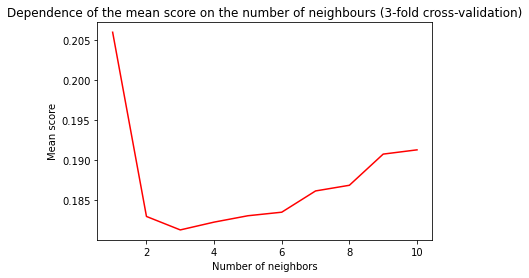

In [202]:
mean_score = []
for i in range(1, 11):
    my_clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    scores = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
    mean_score.append(scores.mean())

plt.plot(range(1, 11), mean_score, 'r')
plt.ylabel('Mean score'),
plt.xlabel('Number of neighbors')
plt.title('Dependence of the mean score on the number of neighbours (3-fold cross-validation)')
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

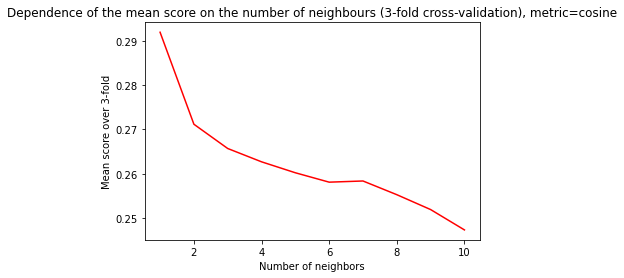

In [188]:
# Use metric='cosine'
mean_score = []
for i in range(1, 11):
    my_clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='cosine')
    scores = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
    mean_score.append(scores.mean())

plt.plot(range(1, 11), mean_score, 'r')
plt.ylabel('Mean score over 3-fold'),
plt.xlabel('Number of neighbors')
plt.title('Dependence of the mean score on the number of neighbours (3-fold cross-validation), metric=cosine')
plt.show()

In [203]:
# Use TfIdf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

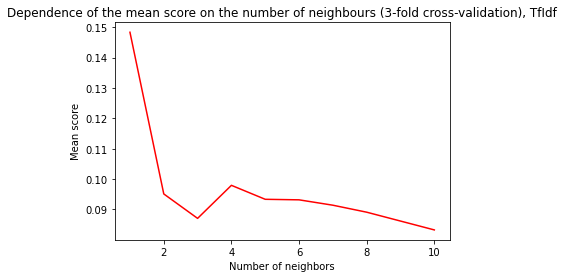

In [190]:
mean_score = []
for i in range(1, 11):
    my_clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    scores = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
    mean_score.append(scores.mean())

plt.plot(range(1, 11), mean_score, 'r')
plt.ylabel('Mean score'),
plt.xlabel('Number of neighbors')
plt.title('Dependence of the mean score on the number of neighbours (3-fold cross-validation), TfIdf')
plt.show()

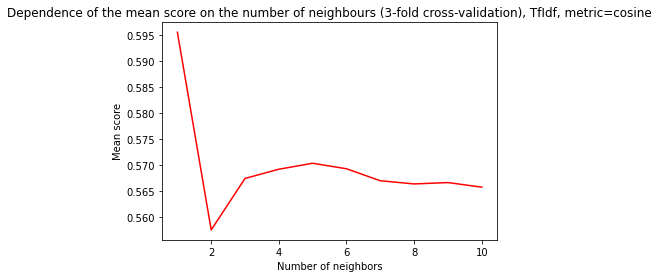

In [196]:
# Use TfIdf with metric='cosine'
mean_score = []
for i in range(1, 11):
    my_clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='cosine')
    scores = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
    mean_score.append(scores.mean())

plt.plot(range(1, 11), mean_score, 'r')
plt.ylabel('Mean score'),
plt.xlabel('Number of neighbors')
plt.title('Dependence of the mean score on the number of neighbours (3-fold cross-validation), TfIdf, metric=cosine')
plt.show()

In [204]:
# Best mean score obtained using TfIdf and cosine metric
my_clf = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='cosine')
score = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
print('score = ', score.mean())

score =  0.5955463121612642


Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [205]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

test_data = newsgroups['data']
test_target = newsgroups['target']

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [206]:
vectorizer = TfidfVectorizer()
X_test = vectorizer.fit_transform(test_data)

my_clf = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='cosine')
scores = cross_val_score(my_clf, X_test, test_target, cv=3, scoring='accuracy')
print('score = ', scores.mean())

score =  0.5649212522008078


Точность модели на test части датасета получилась на 0.03 (5%) меньше. Возможно, это связано с тем, что данные в train и test части датасета распределены по-разному.